In [1]:
import json
from preprocessor.preprocessor_pytorch import Preprocessor
from model.model_pytorch import Model
from postprocessor.postprocessor import Postprocesser
from evaluator.evaluator_pytorch import Evaluator
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import tqdm
import os
import time
import pickle

class ReversePrediction():
    def set_seed(self, seed_value):
        np.random.seed(seed_value)
        tf.random.set_seed(seed_value)
        random.seed(seed_value)
        torch.manual_seed(seed_value)

    def run(self, params):
        self.set_seed(42)
        preprocessor = Preprocessor(params)
        X_train, y_train, X_val, y_val, X_test, y_test, test_dates, X_newest, x_newest_date, y_date, test_dataset = preprocessor.get_multiple_data()

        start_time = time.time()
        model_wrapper = Model(params=params)
        model, history, y_preds, online_history = \
            model_wrapper.run(X_train, y_train, X_test, y_test, X_val, y_val)
        end_time = time.time()
        execution_time = end_time - start_time

        y_preds = torch.tensor(y_preds, dtype=torch.float32)

        y_pred_newest = model.forward(X_newest)
        y_pred_newest = torch.tensor(y_pred_newest, dtype=torch.float32)

        evaluator = Evaluator(params)
        results = evaluator.get_results(y_train, y_val, y_test, y_preds, test_dataset,
                                        test_dates, history, online_history,
                                        show=False)
        results.update({'execution_time': execution_time})
        results.update({'using_data': params})
        
        results_json = json.dumps(results, indent=4)
        with open(params.get('summary_save_path'), 'w') as f:
            f.write(results_json)
            
        return results

2024-05-17 14:25:37.679829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 14:25:37.981325: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-17 14:25:38.011500: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-17 14:25:38.586688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [2]:
with open('parameters.json', 'r') as f:
    params = json.load(f)

In [3]:
# rp = ReversePrediction() 
# rp.set_seed(42)
# results = rp.run(params)

In [4]:
preprocessor = Preprocessor(params)
X_train, y_train, X_val, y_val, X_test, y_test, test_dates, X_newest, x_newest_date, y_date, test_dataset = preprocessor.get_multiple_data()

[*********************100%***********************]  1 of 1 completed


/home/tony/reverse_predict/reversePrediction/preprocessor/preprocessor_pytorch.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PV'].iloc[local_max_indices] = 1
/home/tony/reverse_predict/reversePrediction/preprocessor/preprocessor_pytorch.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PV'].iloc[local_min_indices] = 2


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/home/tony/reverse_predict/reversePrediction/preprocessor/preprocessor_pytorch.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PV'].iloc[local_max_indices] = 1
/home/tony/reverse_predict/reversePrediction/preprocessor/preprocessor_pytorch.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PV'].iloc[local_min_indices] = 2


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/home/tony/reverse_predict/reversePrediction/preprocessor/preprocessor_pytorch.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PV'].iloc[local_max_indices] = 1
/home/tony/reverse_predict/reversePrediction/preprocessor/preprocessor_pytorch.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PV'].iloc[local_min_indices] = 2


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/home/tony/reverse_predict/reversePrediction/preprocessor/preprocessor_pytorch.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PV'].iloc[local_max_indices] = 1
/home/tony/reverse_predict/reversePrediction/preprocessor/preprocessor_pytorch.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PV'].iloc[local_min_indices] = 2


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/home/tony/reverse_predict/reversePrediction/preprocessor/preprocessor_pytorch.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PV'].iloc[local_max_indices] = 1
/home/tony/reverse_predict/reversePrediction/preprocessor/preprocessor_pytorch.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PV'].iloc[local_min_indices] = 2


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Training set shape: torch.Size([15935, 32, 30])
Validation set shape: torch.Size([529, 32, 30])
Test set shape: torch.Size([70, 32, 30])


In [5]:
start_time = time.time()
model_wrapper = Model(params=params)
model, history, y_preds, online_history = \
    model_wrapper.run(X_train, y_train, X_test, y_test, X_val, y_val)
end_time = time.time()
execution_time = end_time - start_time


  0%|          | 0/10000 [00:00<?, ?it/s]

  2%|▏         | 213/10000 [05:56<4:33:10,  1.67s/it]

rollback_epoch: 163


In [6]:
y_preds = torch.tensor(y_preds, dtype=torch.float32)
y_preds_original = y_preds.clone()


In [7]:
y_pred_newest = model.forward(X_newest)
y_pred_newest = torch.tensor(y_pred_newest, dtype=torch.float32)


/tmp/ipykernel_3239119/2604493356.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred_newest = torch.tensor(y_pred_newest, dtype=torch.float32)


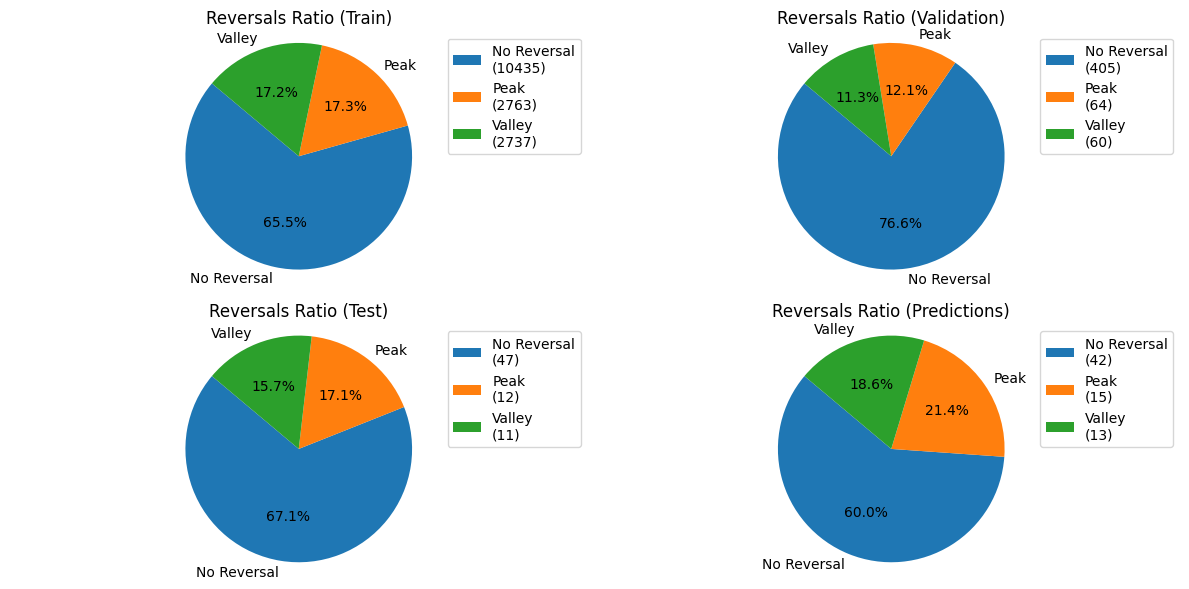

<Figure size 640x480 with 0 Axes>

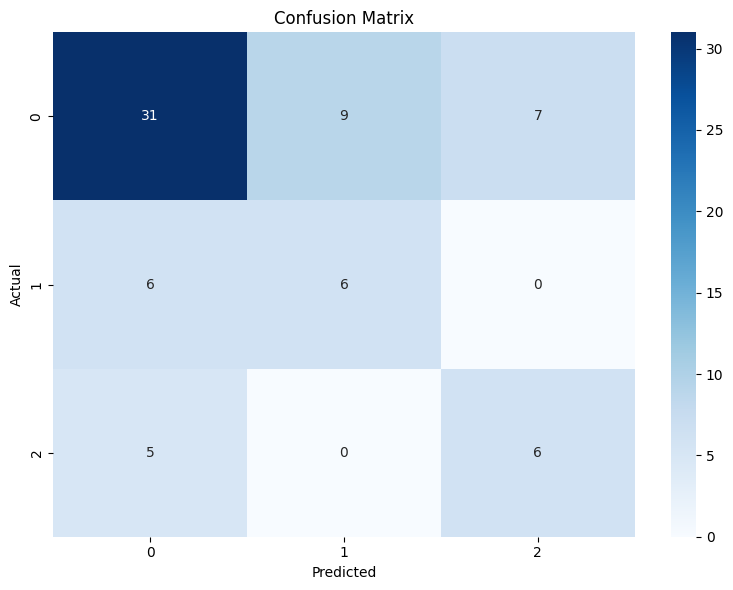

<Figure size 640x480 with 0 Axes>

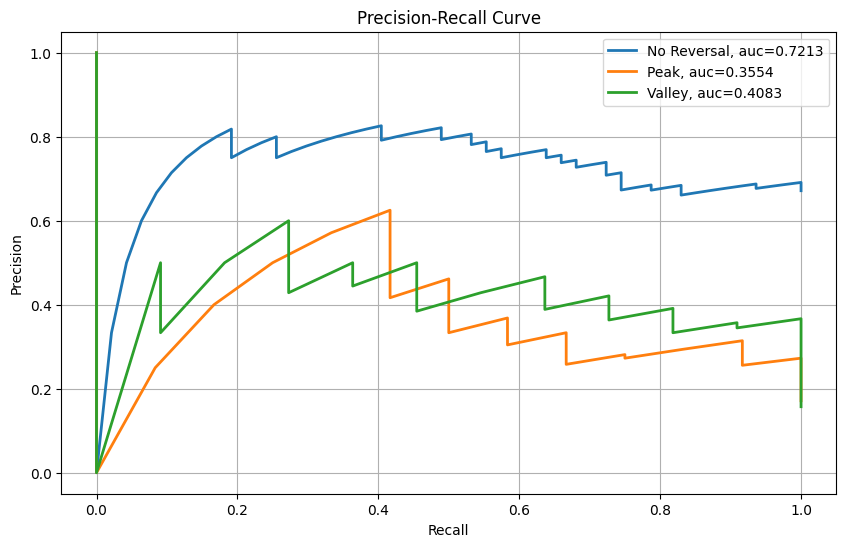

<Figure size 640x480 with 0 Axes>

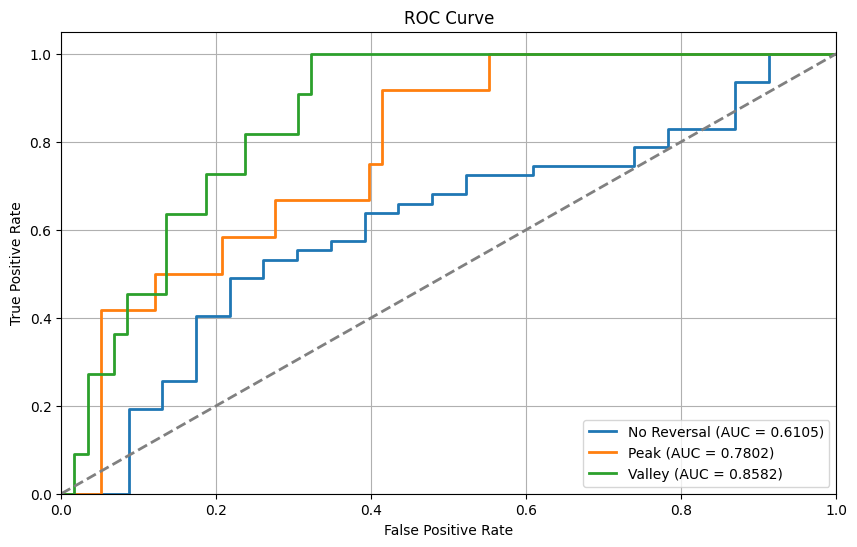

<Figure size 640x480 with 0 Axes>

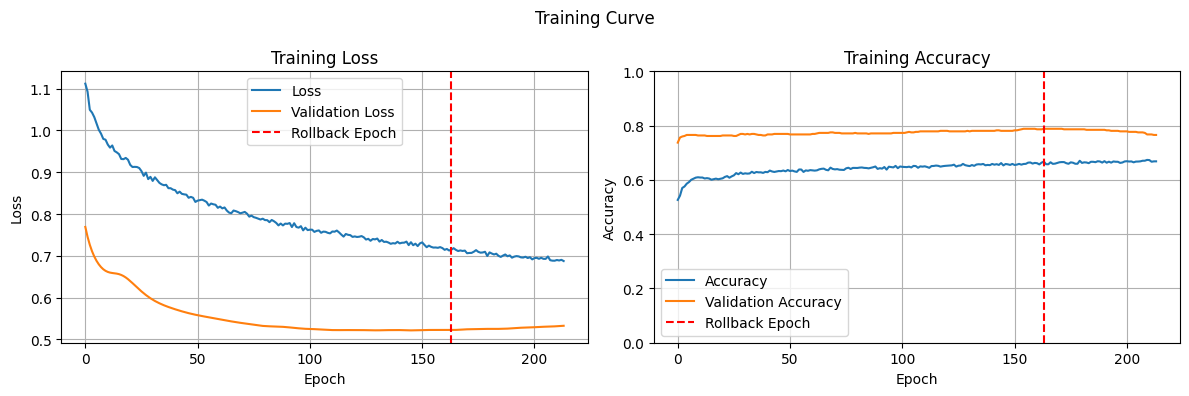

<Figure size 640x480 with 0 Axes>

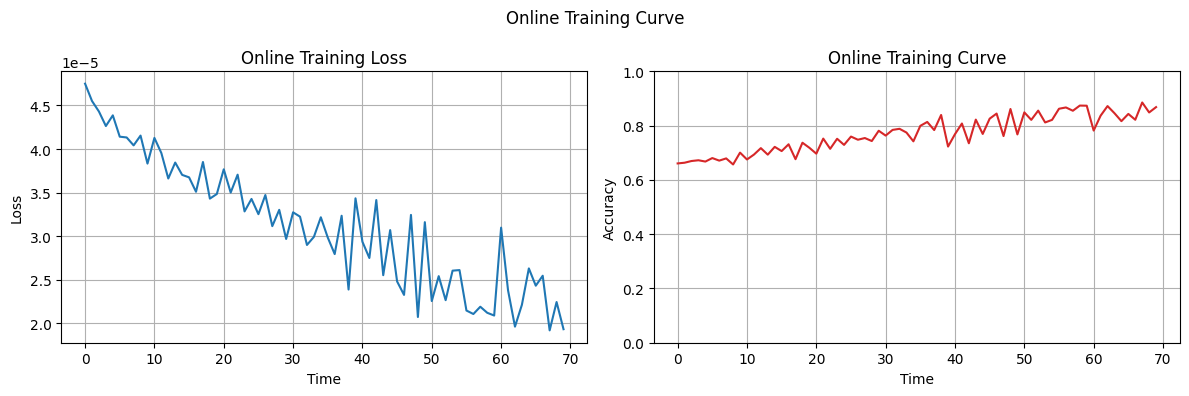

<Figure size 640x480 with 0 Axes>

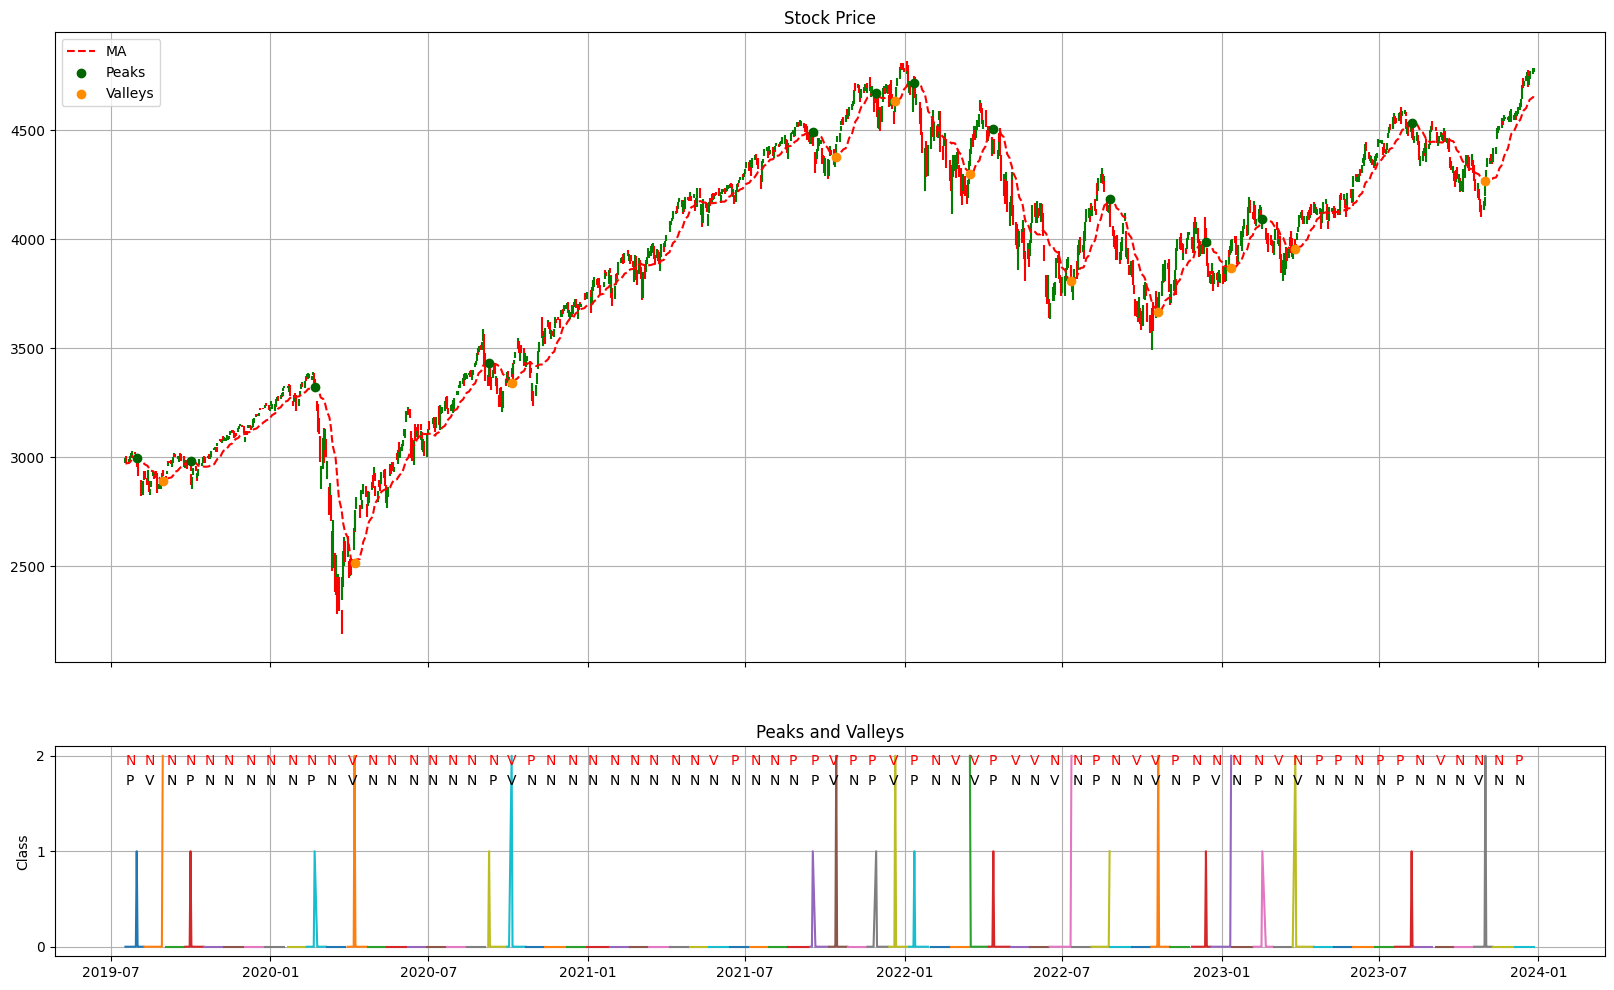

<Figure size 640x480 with 0 Axes>

In [8]:
evaluator = Evaluator(params)
results = evaluator.get_results(y_train, y_val, y_test, y_preds, test_dataset, test_dates, history, online_history, show=True)

In [9]:
results

{'confusion metrics': {'Class': {0: 'No Reversal',
   1: 'Peak',
   2: 'Valley',
   3: 'Macro-average',
   4: 'Micro-average'},
  'Accuracy': {0: 0.6142857142857143,
   1: 0.6142857142857143,
   2: 0.6142857142857143,
   3: 0.6142857142857143,
   4: 0.6142857142857143},
  'Precision': {0: 0.7380952380952381,
   1: 0.4,
   2: 0.46153846153846156,
   3: 0.5332112332112332,
   4: 0.6142857142857143},
  'Recall': {0: 0.6595744680851063,
   1: 0.5,
   2: 0.5454545454545454,
   3: 0.5683430045132173,
   4: 0.6142857142857143},
  'F1-Score': {0: 0.6966292134831461,
   1: 0.4444444444444445,
   2: 0.4999999999999999,
   3: 0.5470245526425302,
   4: 0.6142857142857143},
  'Specificity': {0: 0.775, 1: 0.775, 2: 0.775, 3: 0.775, 4: 0.775},
  'False Positive Rate': {0: 0.225, 1: 0.225, 2: 0.225, 3: 0.225, 4: 0.225},
  'False Negative Rate': {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5}},
 'pr_auc': [0.7213, 0.3554, 0.4083],
 'roc_auc': [0.61054579093432, 0.7801724137931034, 0.8582434514637903],
 'kappa

In [10]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

y_test_max_indices = np.argmax(y_test, axis=-1)
y_preds_max_indices = np.argmax(y_preds, axis=-1)

accuracy = accuracy_score(y_test_max_indices, y_preds_max_indices)
f1 = f1_score(y_test_max_indices, y_preds_max_indices, average='weighted')
precision = precision_score(y_test_max_indices, y_preds_max_indices, average='weighted')
recall = recall_score(y_test_max_indices, y_preds_max_indices, average='weighted')

accuracy, f1, precision, recall

(0.6142857142857143,
 0.6224986623863029,
 0.6366771323914181,
 0.6142857142857143)